"""
Spyder Editor

Partial Dependence Plots : ML for Insights Challenge Day 2

Ilyssa Summer
Sep 20, 2018


Partial Dependence plots

- Feature Importance shows what variables most affect predictions
- Partial dependence shows how a feature affects predictions

Partial dependence plots are like coefficients in linear or logistic regression models

Like permutation importance, partial dependence plots are calcuated after a model as been fit.
"""




"""
Use fitted model to predict outcome
Then repeatedly alter the value for one variable to make a series of predictions

"""


In [5]:
#Code for FIFA stats

import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


#Load data

data = pd.read_csv('FIFA 2018 Statistics.csv')
data.describe()
data.head()

df2 = data.filter(regex='Man of the Match')
print(df2)

y = (data['Man of the Match'] == "Yes")
#Converting from string "Yes"/"No" to binary

feature_names=[i for i in data.columns if data[i].dtype in [np.int64]]

X = data[feature_names]
train_X, val_X, train_y, val_y= train_test_split(X, y, random_state=1)

tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X,train_y)


    Man of the Match
0                Yes
1                 No
2                 No
3                Yes
4                 No
5                Yes
6                 No
7                Yes
8                Yes
9                 No
10                No
11               Yes
12                No
13               Yes
14               Yes
15                No
16                No
17               Yes
18               Yes
19                No
20               Yes
21                No
22               Yes
23                No
24               Yes
25                No
26                No
27               Yes
28                No
29               Yes
..               ...
98               Yes
99                No
100               No
101              Yes
102              Yes
103               No
104              Yes
105               No
106              Yes
107               No
108              Yes
109               No
110               No
111              Yes
112               No
113          

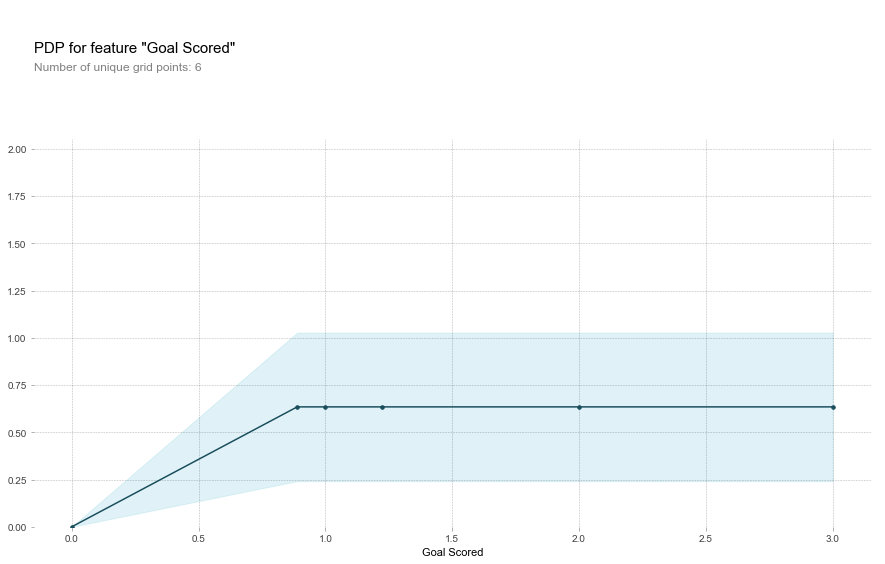

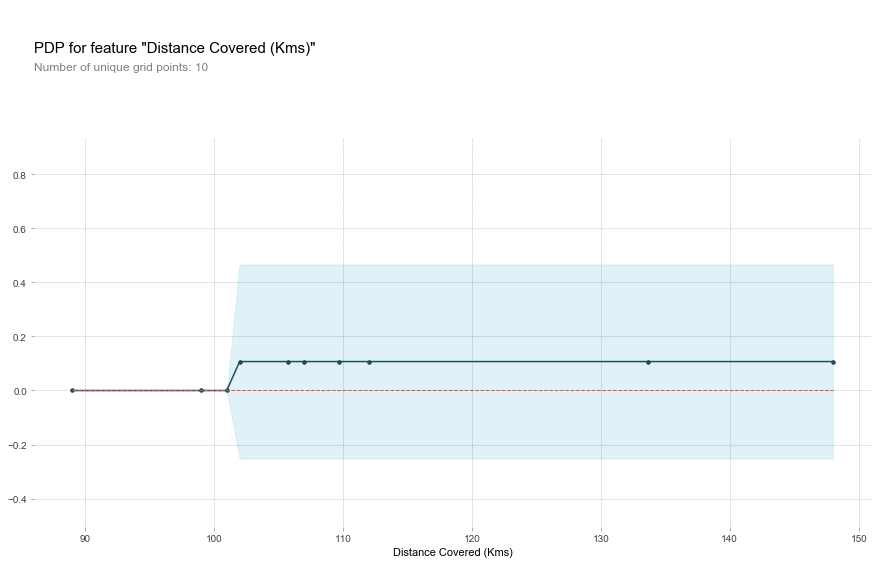

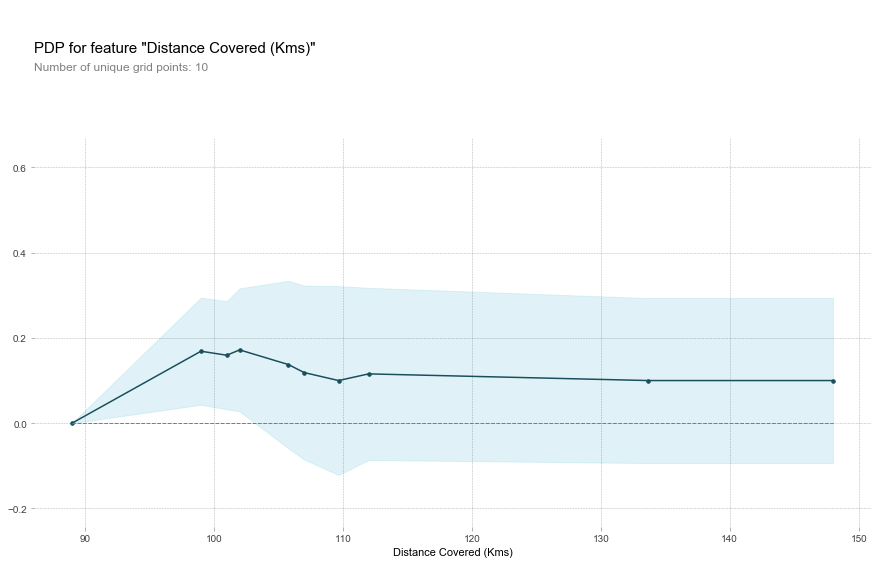

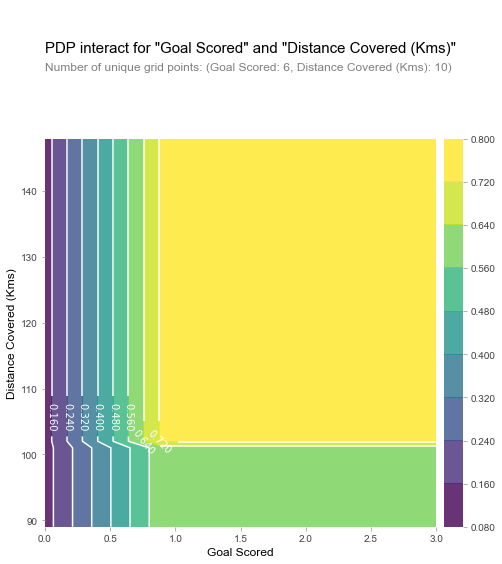

Data sample:


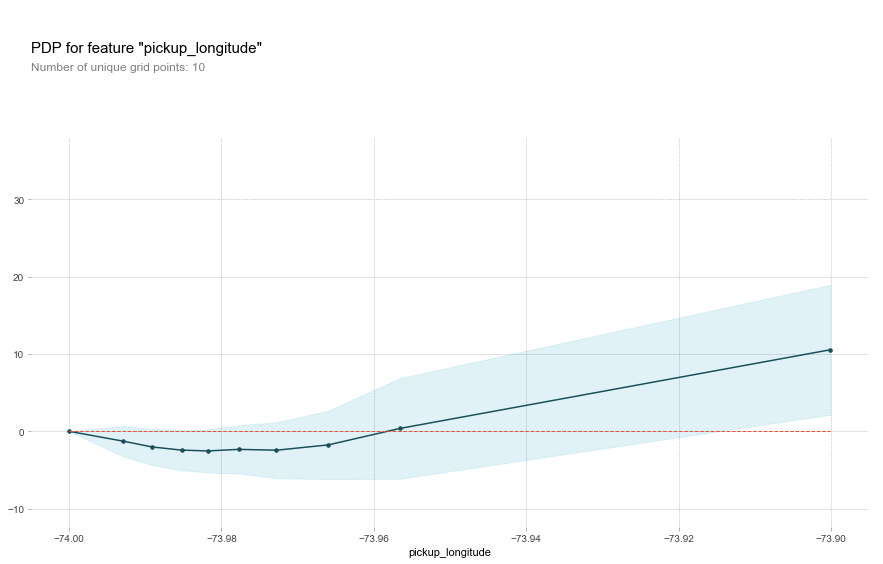

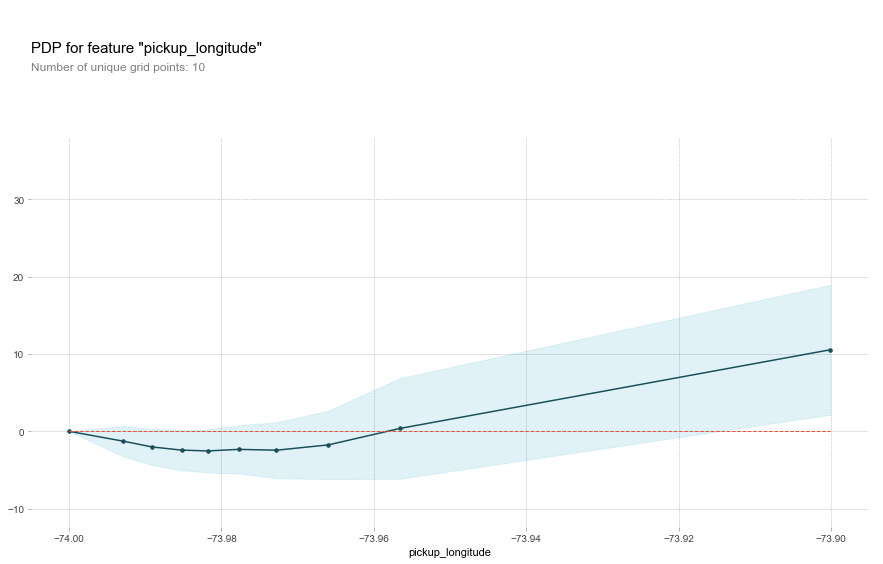

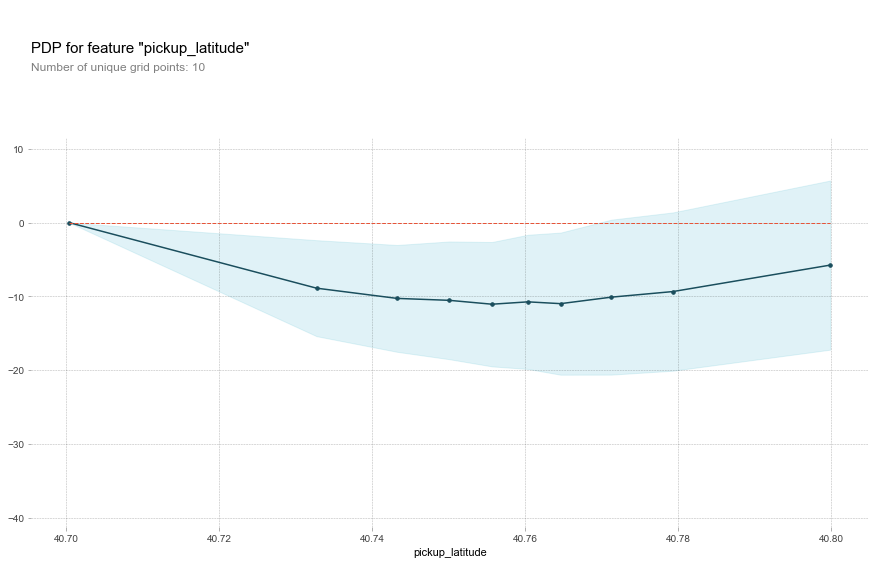

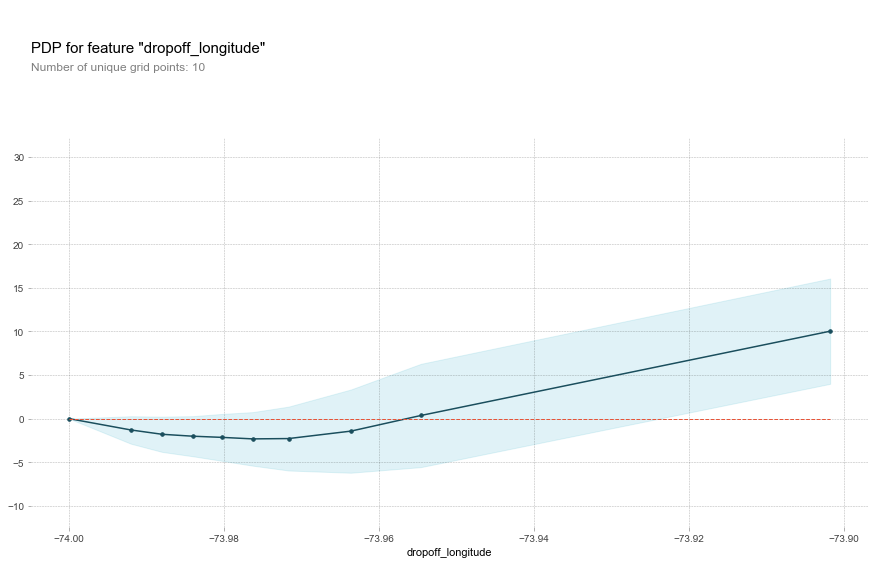

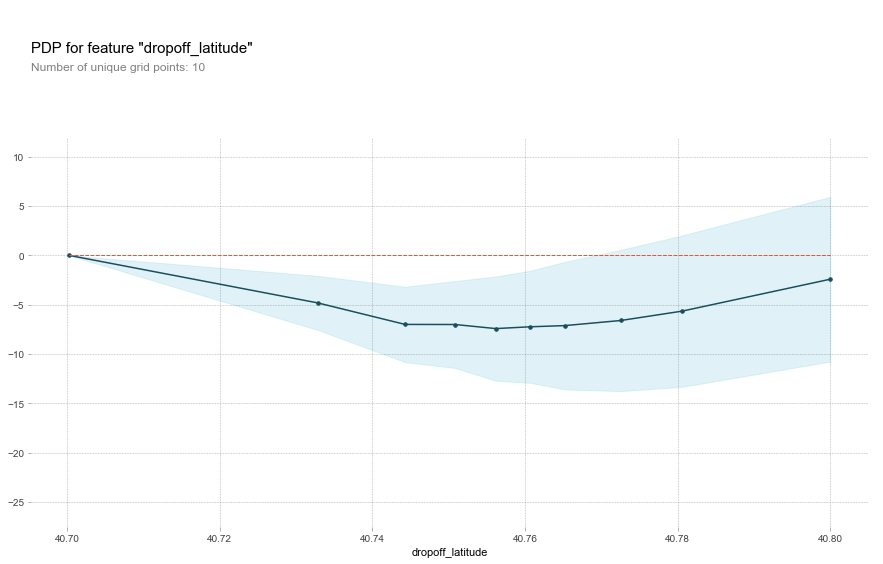

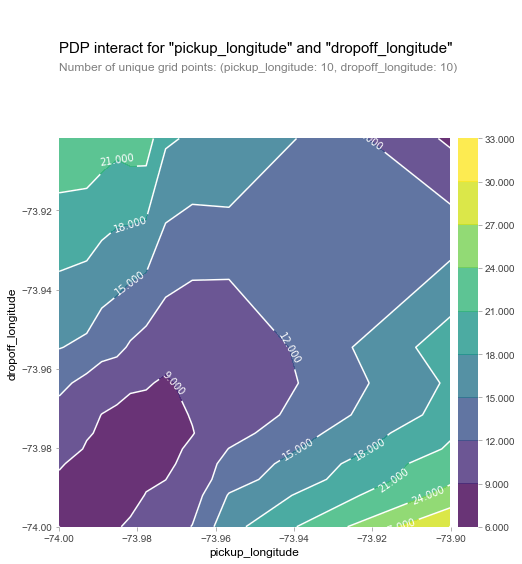

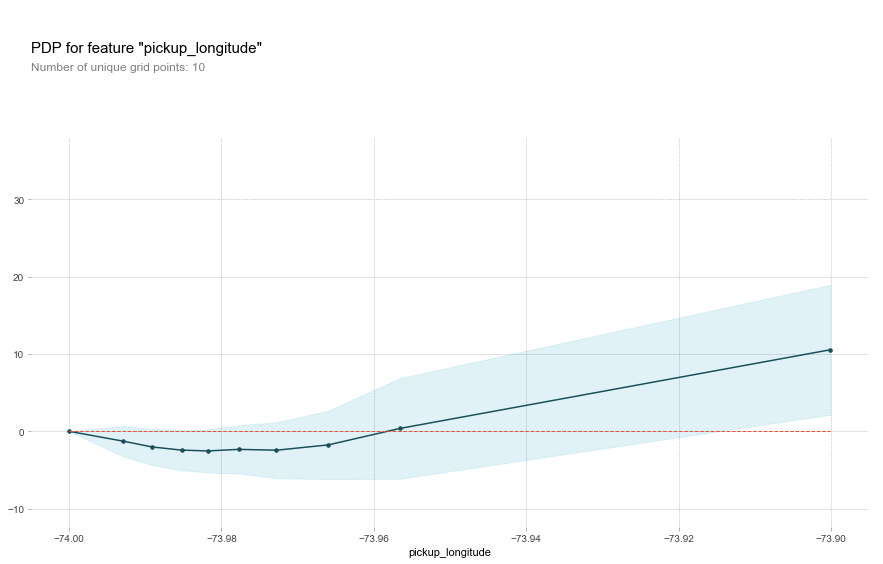

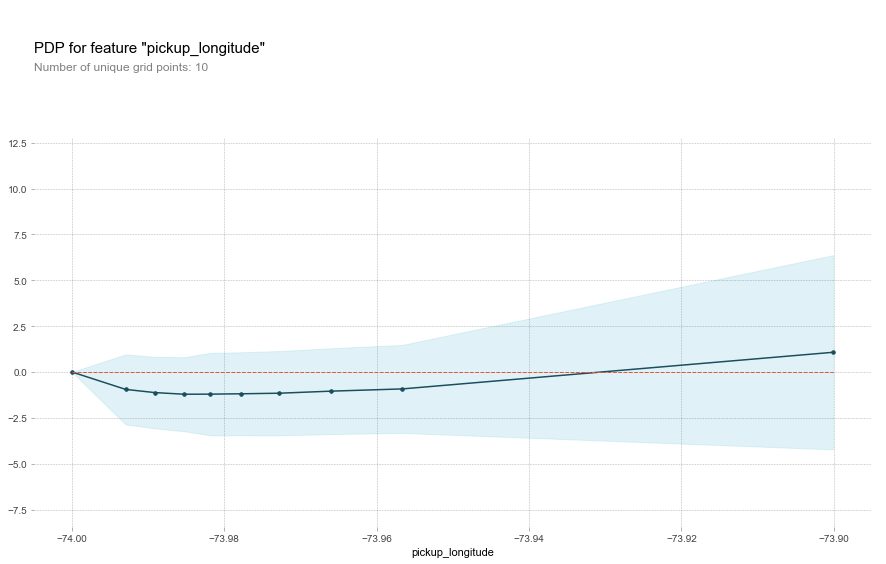

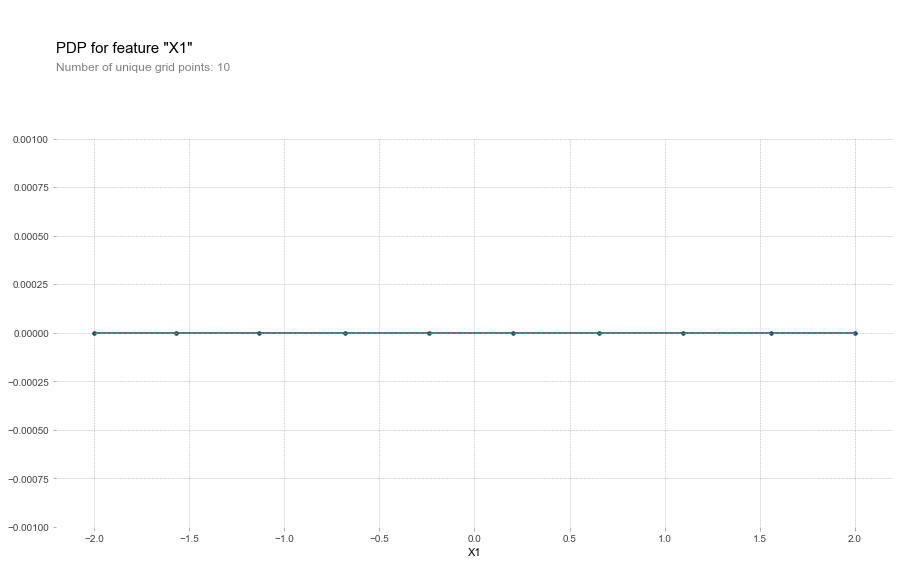

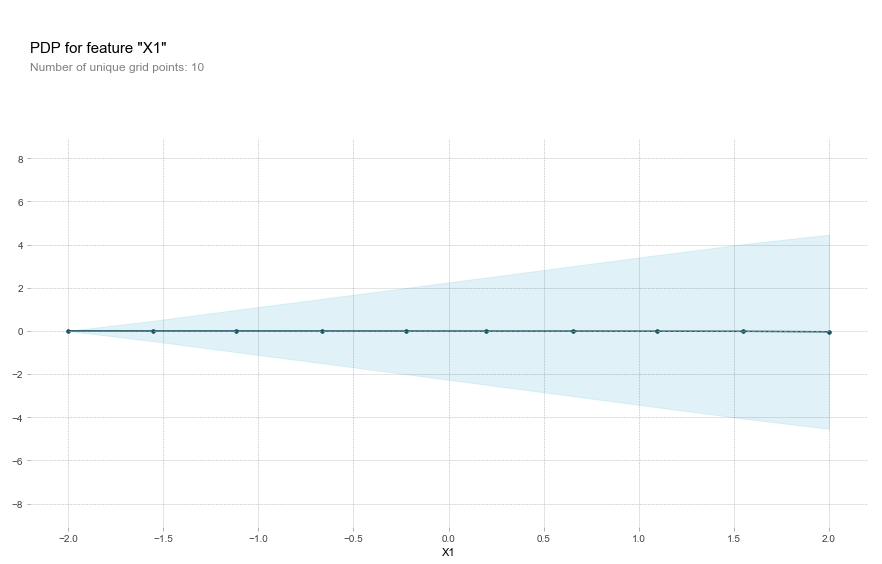

Weight,Feature
1.9902 ± 0.0552,X2
1.9840 ± 0.0355,X1


In [9]:
#Browse Decision Tree

from sklearn import tree
from graphviz import Digraph
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)


#As guidance to read the tree:
# - Leaves with children show their splitting criterion on the top
 #- The pair of values at the bottom show the count of True values and False values 
#for the target respectively, of data points in that node of the tree.



#Code using partial dependence plot

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

#Create the data we will plot

pdp_goals = pdp.pdp_isolate(model= tree_model, dataset=val_X, model_features=feature_names, feature='Goal Scored')


#plot it

pdp.pdp_plot(pdp_goals, 'Goal Scored')

"""
A few items are worth pointing out as you interpret this plot
- The y axis is interpreted as **change in the prediction** from what it would be predicted at the baseline or leftmost value.
- A blue shaded area indicates level of confidence

From this particular graph, we see that scoring a goal substantially increases your chances of winning "Player of The Game."  But extra goals beyond that appear to have little impact on predictions.
"""

feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)


pdp.pdp_plot(pdp_dist, feature_to_plot)

plt.show()

"""
This graph seems too simple to represent reality. But that's because the model is so simple. You should be able to see from the decision tree above that this is representing exactly the model's structure.

You can easily compare the structure or implications of different models. Here is the same plot with a Random Forest model.
"""


#Build a random forest model

rf_model = RandomForestClassifier(random_state=0).fit(train_X,train_y)
pdp_dist=pdp.pdp_isolate(model=rf_model,dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)

plt.show()


"""
This model thinks you are more likely to win *Player of The Game* if your players run a total of 100km over the course of the game. Though running much more causes lower predictions.
"""

"""
For 2D partial dependence plots
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate 
and pdp_interact_plot instead of pdp_isolate_plot

"""

features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()


"""
This graph shows predictions for any combination of Goals Scored and Distance covered. 

For example, we see the highest predictions when a team scores at least 1 goal and they run a total distance close to 100km.  If they score 0 goals, distance covered doesn't matter. Can you see this by tracing through the decision tree with 0 goals?

But distance can impact predictions if they score goals. Make sure you can see this from the 2D partial dependence plot. Can you see this pattern in the decision tree too?
"""

#Code for Taxi Fare

# Notice RandomForestClassifier to Regressor 

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

#
## Environment Set-Up for feedback system.
#import sys
#sys.path.append('../input/ml-insights-tools')
#from learntools.core import binder
#binder.bind(globals())
#from ex3 import *
#print("Setup Complete")

#Data manipulation

data = pd.read_csv('TaxiFare.csv')
data.describe, data.shape 

# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )


#Set up predictor 
y= data.fare_amount
data.describe()
data.columns

#Since there are 8 coulmns,with one we want to predict, we focus our features on the remaining 7. Of those, we do not need the key, nor passenger count, nor pickup_datime.Thus we focus the base features on 4


base_features = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
base_features

X=data[base_features]

#Since we have the base features, next we set the training values
#We use train_test_split for X (our features/variables of choice subsetted from the data) + 
#y our predictor variable, fare_amount
#random_state=1 for reproducibility

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


#set up regressor model with n_estimators  (number of trees in forest) . fit(train variables)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)

print("Data sample:")
data.head()
data.describe()

# This is the code for the partial depedence plot for pickup_longitude

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# featuring...
feat_name= 'pickup_longitude'
 
#The parital dependence plot implemented in python aims to visualize the marginaleffect 
 
pdp_dist=  pdp.pdp_isolate(model= first_model, dataset= val_X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X,
                               model_features=base_features, feature=feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

#create feature names via fnames
fnames = ['pickup_longitude', 'dropoff_longitude']

#2D plot uses interact term 
#since we chose longitudes, we'll use
#longitudes_partial_plot
longitudes_partial_plot  =  pdp.pdp_interact(model=first_model, dataset=val_X,
                                            model_features=base_features, features=fnames)
#create plot with features as fnames 
# x axis  is the pickup_longitude 
# plot_type ='contour'
pdp.pdp_interact_plot(pdp_interact_out=longitudes_partial_plot,
                      feature_names=fnames, plot_type='contour')
plt.show()

#Consider a ride starting at longitude -73.92 and 
#ending at longitude -74. 
#Using the graph from the last question, 
#estimate how much money the rider would have saved if they'd started the ride at longitude -73.98 instead?

#15 according to the graph


#In the PDP's you've seen so far, location features have primarily served as a proxy to capture distance traveled. In the permutation importance lessons, you added the features `abs_lon_change` and `abs_lat_change` as a more direct measure of distance.

#Create these features again here. You only need to fill in the top two lines.  Then run the following cell.  

#**After you run it, identify the most important difference between this partial dependence plot and the one you got without absolute value features. The code to generate the PDP without absolute value features is at the top of this code cell.**


# This is the PDP for pickup_longitude without the absolute difference features. Included here to help compare it to the new PDP you create
feat_name = 'pickup_longitude'
pdp_dist_original = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist_original, feat_name)
plt.show()



# create new features
# data[' '] adds columns to data
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

feat_name = 'pickup_longitude'
pdp_dist = pdp.pdp_isolate(model=second_model, dataset=new_val_X, model_features=features_2, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

"""
Q6:
The code cell below does the following:

Creates two features, X1 and X2, having random values in the range [-2, 2].
Creates a target variable y, which is always 1.
Trains a RandomForestRegressor model to predict y given X1 and X2.
Creates a PDP plot for X1 and a scatter plot of X1 vs. y.
Do you have a prediction about what the PDP plot will look like? Run the cell to find out.

Modify the initialization of y so that our PDP plot has a positive slope in the range [-1,1], and a negative slope everywhere else. (Note: you should only modify the creation of y, leaving X1, X2, and my_model unchanged.)
"""

from numpy.random import rand

n_samples = 20000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2
# Create y. you should have X1 and X2 in the expression for y
y = np.ones(n_samples)

# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)

pdp_dist = pdp.pdp_isolate(model=my_model, dataset=my_df, model_features=['X1', 'X2'], feature='X1')

# visualize your results
pdp.pdp_plot(pdp_dist, 'X1')
plt.show()

"""## Question 7
Create a dataset with 2 features and a target, such that the pdp of the first feature is flat, but its permutation importance is high.  We will use a RandomForest for the model.

*Note: You only need to supply the lines that create the variables X1, X2 and y. The code to build the model and calculate insights is provided*.
"""


import eli5
from eli5.sklearn import PermutationImportance

n_samples = 20000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2
# Create y. you should have X1 and X2 in the expression for y
y =  X1*X2


# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)


pdp_dist = pdp.pdp_isolate(model=my_model, dataset=my_df, model_features=['X1', 'X2'], feature='X1')
pdp.pdp_plot(pdp_dist, 'X1')
plt.show()

perm = PermutationImportance(my_model).fit(predictors_df, my_df.y)


# show the weights for the permutation importance you just calculated
eli5.show_weights(perm, feature_names = ['X1', 'X2'])



